In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score
)

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
expr = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_log_normalized.csv",
    index_col=0
)

metadata = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_metadata.csv",
    index_col=0
)

expr.shape, metadata.shape


((29830, 79), (79, 6))

In [4]:
metadata.head()


,tissue,group,nevus type,braf mutation,nras mutation,condition
GSM3071633,benign melanocytic nevi,Naevi_1,dermal,mut,wt,Benign
GSM3071634,benign melanocytic nevi,Naevi_1,dermal,mut,mut,Benign
GSM3071635,benign melanocytic nevi,Naevi_1,compound,mut,wt,Benign
GSM3071636,benign melanocytic nevi,Naevi_1,dermal,wt,mut,Benign
GSM3071637,benign melanocytic nevi,Naevi_1,dermal,mut,wt,Benign


In [5]:
# --- Define labels correctly ---
y = metadata["condition"].map({
    "Benign": 0,
    "Melanoma": 1
})

# Sanity check
print(y.value_counts())



condition
1    56
0    23
Name: count, dtype: int64


In [6]:
X = expr.T  # samples × genes

X.shape, y.shape


((79, 29830), (79,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [8]:
gene_variance = X_train.var(axis=0)
top_genes = gene_variance.sort_values(ascending=False).head(2000).index

X_train = X_train[top_genes]
X_test = X_test[top_genes]


In [9]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


In [10]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [11]:
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(probability=True))
])

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


In [12]:
results = {
    "Logistic Regression": f1_score(y_test, y_pred_lr, average="weighted"),
    "Random Forest": f1_score(y_test, y_pred_rf, average="weighted"),
    "SVM": f1_score(y_test, y_pred_svm, average="weighted")
}

pd.Series(results).sort_values(ascending=False)


Logistic Regression    0.950997
Random Forest          0.948589
SVM                    0.948589
dtype: float64

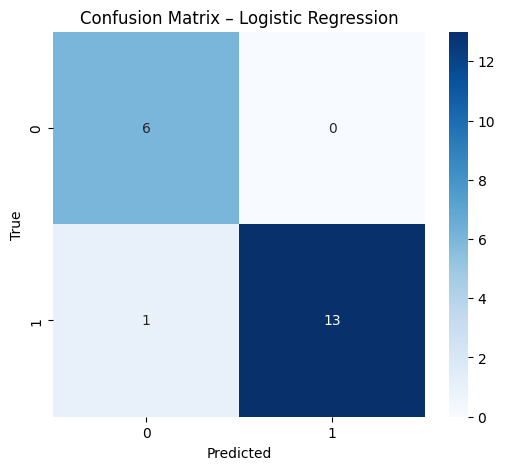

In [13]:
best_model_name = max(results, key=results.get)

best_preds = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}[best_model_name]

plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, best_preds),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
if len(np.unique(y)) == 2:
    y_prob = svm.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc


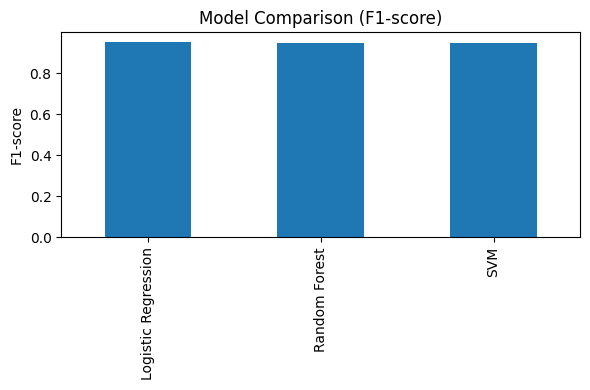

In [15]:
pd.Series(results).plot(
    kind="bar",
    figsize=(6,4),
    title="Model Comparison (F1-score)"
)
plt.ylabel("F1-score")
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Load expression data (genes x samples)
expr = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_log_normalized.csv",
    index_col=0
)

# Load metadata
metadata = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_metadata.csv",
    index_col=0
)

expr.shape, metadata.shape


((29830, 79), (79, 6))

In [31]:
# Features: samples x genes
X = expr.T

# Labels (binary classification assumed)
y = metadata.loc[X.index, "condition"]

X.shape, y.value_counts()


((79, 29830),
 condition
 Melanoma    56
 Benign      23
 Name: count, dtype: int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [33]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]


In [34]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True))
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [36]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

print("SVM")
print(classification_report(y_test, y_pred_svm))


Logistic Regression
              precision    recall  f1-score   support

      Benign       0.83      0.83      0.83         6
    Melanoma       0.93      0.93      0.93        14

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20

Random Forest
              precision    recall  f1-score   support

      Benign       1.00      0.67      0.80         6
    Melanoma       0.88      1.00      0.93        14

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20

SVM
              precision    recall  f1-score   support

      Benign       1.00      0.50      0.67         6
    Melanoma       0.82      1.00      0.90        14

    accuracy                           0.85        20
   macro avg       0.91      0.75      0.78        20
weighted avg       0.88      0.85   

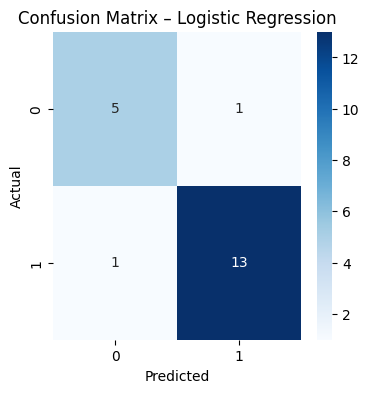

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [38]:
from xgboost import XGBClassifier


In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode labels for XGBoost
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Check mapping
dict(zip(le.classes_, le.transform(le.classes_)))


{'Benign': np.int64(0), 'Melanoma': np.int64(1)}

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train_enc)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]



In [41]:
# Decode predictions back to original labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb_labels))


XGBoost
              precision    recall  f1-score   support

      Benign       1.00      0.83      0.91         6
    Melanoma       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_xgb = roc_auc_score(y_test_enc, y_prob_xgb)
auc_xgb


0.9523809523809524

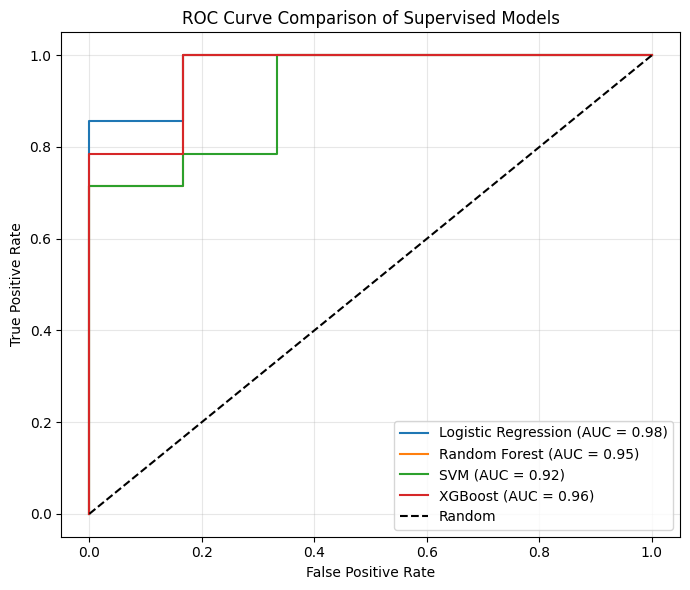

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr, pos_label="Melanoma")
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label="Melanoma")
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm, pos_label="Melanoma")
auc_svm = roc_auc_score(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

# XGBoost (uses encoded labels)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_enc, y_prob_xgb)
auc_xgb = roc_auc_score(y_test_enc, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

# Random classifier line
plt.plot([0,1], [0,1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Supervised Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [43]:
import os
import joblib

# Create models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save trained model
joblib.dump(lr_pipeline, "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/models/lr_pipeline.joblib")

print("Model saved to C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/models/lr_pipeline.joblib")


Model saved to C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/models/lr_pipeline.joblib


In [45]:
expr.shape, meta.shape


NameError: name 'meta' is not defined